In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression

# Question 1

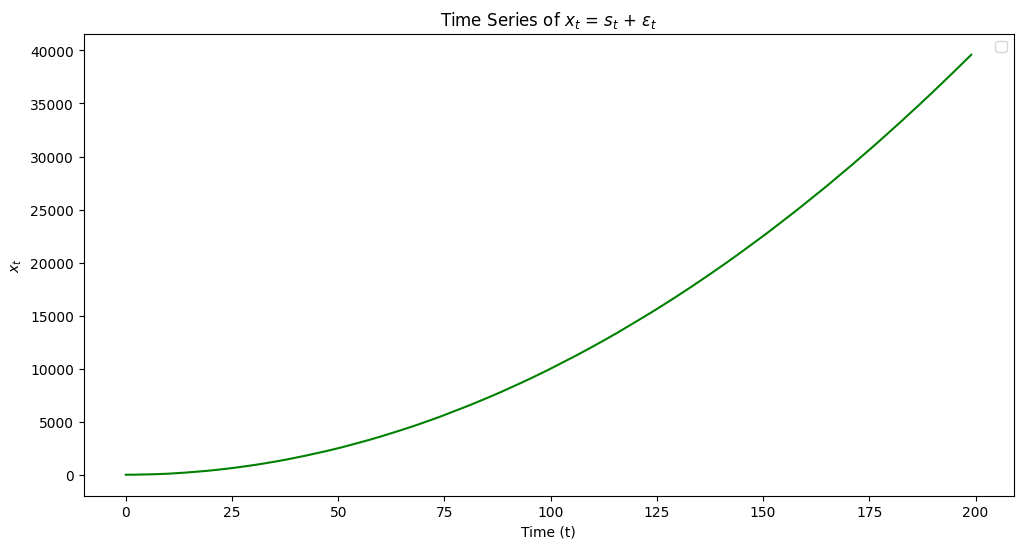

In [ ]:
# Set the length of the time series
n = 200

# Generate strong Gaussian white noise with variance 4
np.random.seed(20931263)
w = np.random.normal(0, 2, n) # Note 2 represents the standard deviation

# Generating epsilon_t according to formula
eps = np.zeros(n) # Create an array of size n of all 0s
eps[0] = w[0]  # Initial value
for t in range(1, n):
    eps[t] = w[t] + 0.5 * w[t-1] # According to the formula

# Calculate s_t
s = np.arange(n)**2 # Creates an array of size n, of values from 0^2 , ... , (n-1)^2

# Calculate x_t
x = s + eps

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(x, color="green")
plt.title('Time Series of $x_t$ = $s_t$ + $ε_t$')
plt.xlabel('Time (t)')
plt.ylabel('$x_t$')
plt.legend()
plt.show()

<Figure size 2400x1200 with 0 Axes>

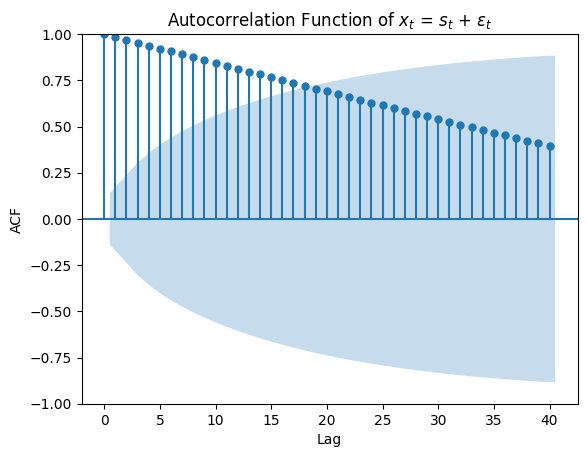

In [ ]:
# Generating the ACF Plot from matplotlib.pyplot
plt.figure(figsize=(24, 12))
plot_acf(x, lags=40)
plt.title('Autocorrelation Function of $x_t$ = $s_t$ + $ε_t$')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [ ]:
# Creating the time indexes
t = []
for i in range(n):
    t.append([i])
t = np.array(t)

# Creating our Linear Model
model = LinearRegression() # Utilized from sklearn.linear_model import LinearRegression()
# From the Official Site: LinearRegression() fits a linear model with coefficients
# w = (w_1, ... ,w_p) to minmize the residual sum of squares...
# AKA Lest Squares Method
model.fit(t, x)
trend = model.predict(t)


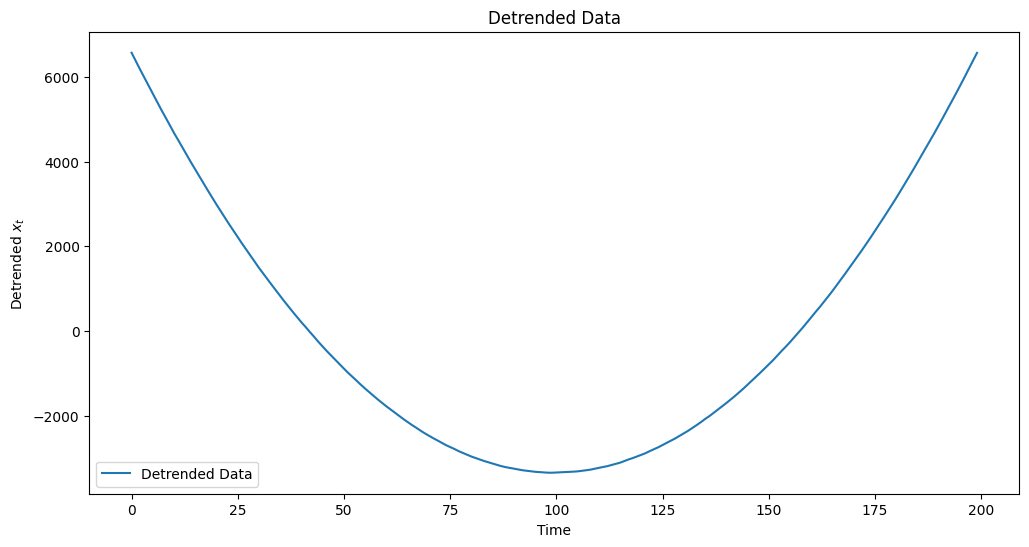

In [ ]:
# Detrend the data
detrended_data = x - trend

plt.figure(figsize=(12, 6))
plt.plot(detrended_data, label='Detrended Data')
plt.title('Detrended Data')
plt.xlabel('Time')
plt.ylabel('Detrended $x_t$')
plt.legend()
plt.show()

In [ ]:
# Print the coefficients for the trend
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")


Intercept (beta_0): -6566.600773405004
Slope (beta_1): 199.00044065328015


<Figure size 1200x600 with 0 Axes>

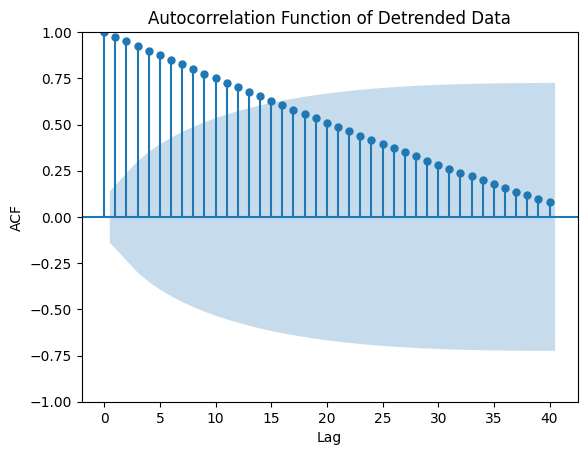

In [ ]:
# Plot the ACF of the detrended data
plt.figure(figsize=(12, 6))
plot_acf(detrended_data, lags=40)
plt.title('Autocorrelation Function of Detrended Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

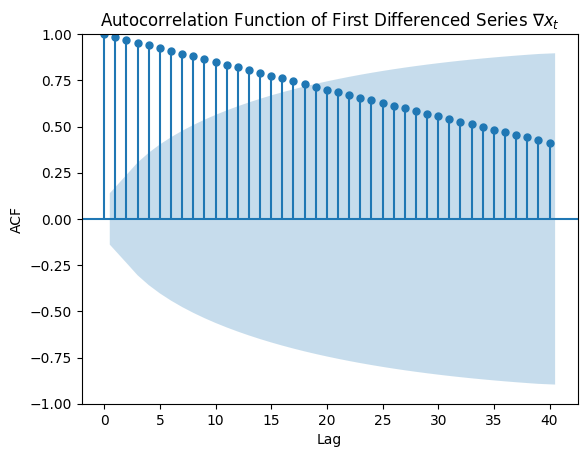

In [ ]:
# First Difference Calculations
diff_x = np.diff(x)

# Second Difference Calculations
diff2_x = np.diff(diff_x)

# Plot the ACF of the first differenced series
plt.figure(figsize=(12, 6))
plot_acf(diff_x, lags=40)
plt.title('Autocorrelation Function of First Differenced Series $\\nabla x_t$')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

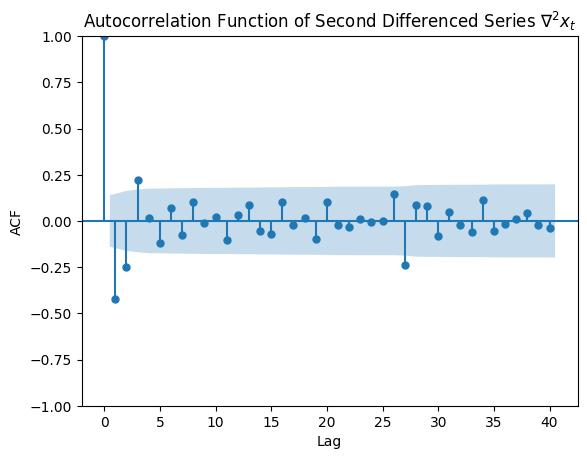

In [ ]:
# Plot the ACF of the second differenced series
plt.figure(figsize=(12, 6))
plot_acf(diff2_x, lags=40)
plt.title('Autocorrelation Function of Second Differenced Series $\\nabla^2 x_t$')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

<ipython-input-12-dc1cf1ec5e0b>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_diff_x, use_line_collection=True)
<ipython-input-12-dc1cf1ec5e0b>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_diff2_x, use_line_collection=True)


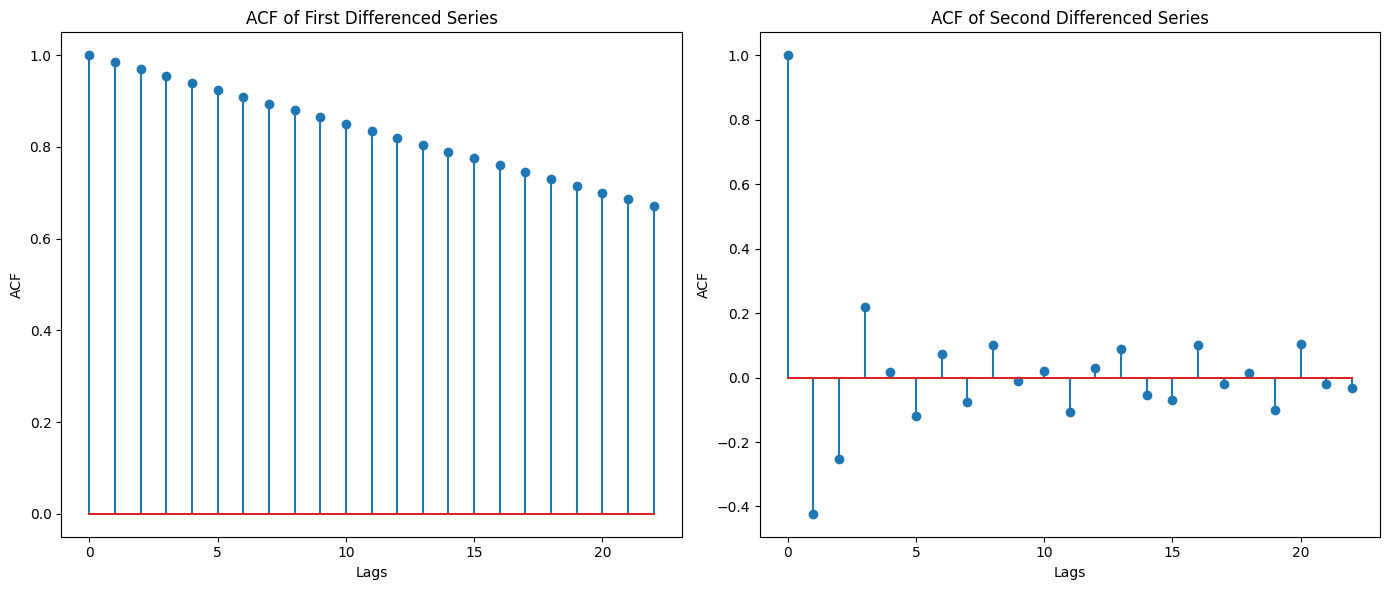

(array([1.        , 0.98461691, 0.96963801, 0.95461818, 0.93986347,
        0.92471224, 0.90950426, 0.89440204, 0.87982137, 0.8645789 ,
        0.84910049, 0.83442181, 0.8197623 , 0.80491506, 0.79006769,
        0.77513554, 0.76033484, 0.74546803, 0.73039367, 0.71492966,
        0.70032151, 0.68603257, 0.67105061]),
 array([ 1.        , -0.4227513 , -0.25145634,  0.21943315,  0.01646555,
        -0.11848793,  0.0722051 , -0.07698141,  0.10156453, -0.00937487,
         0.02034341, -0.10572173,  0.02955872,  0.08766217, -0.05357656,
        -0.06816262,  0.10003848, -0.02073836,  0.01476511, -0.09975475,
         0.10335386, -0.02112296, -0.03147577]))

In [ ]:
# Calculate differenced series
diff_x = np.diff(x)
diff2_x = np.diff(diff_x)

# Calculate ACF
acf_diff_x = acf(diff_x, fft=True)
acf_diff2_x = acf(diff2_x, fft=True)

# Plotting the ACFs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.stem(acf_diff_x, use_line_collection=True)
plt.title("ACF of First Differenced Series")
plt.xlabel("Lags")
plt.ylabel("ACF")

plt.subplot(1, 2, 2)
plt.stem(acf_diff2_x, use_line_collection=True)
plt.title("ACF of Second Differenced Series")
plt.xlabel("Lags")
plt.ylabel("ACF")

plt.tight_layout()
plt.show()

acf_diff_x, acf_diff2_x


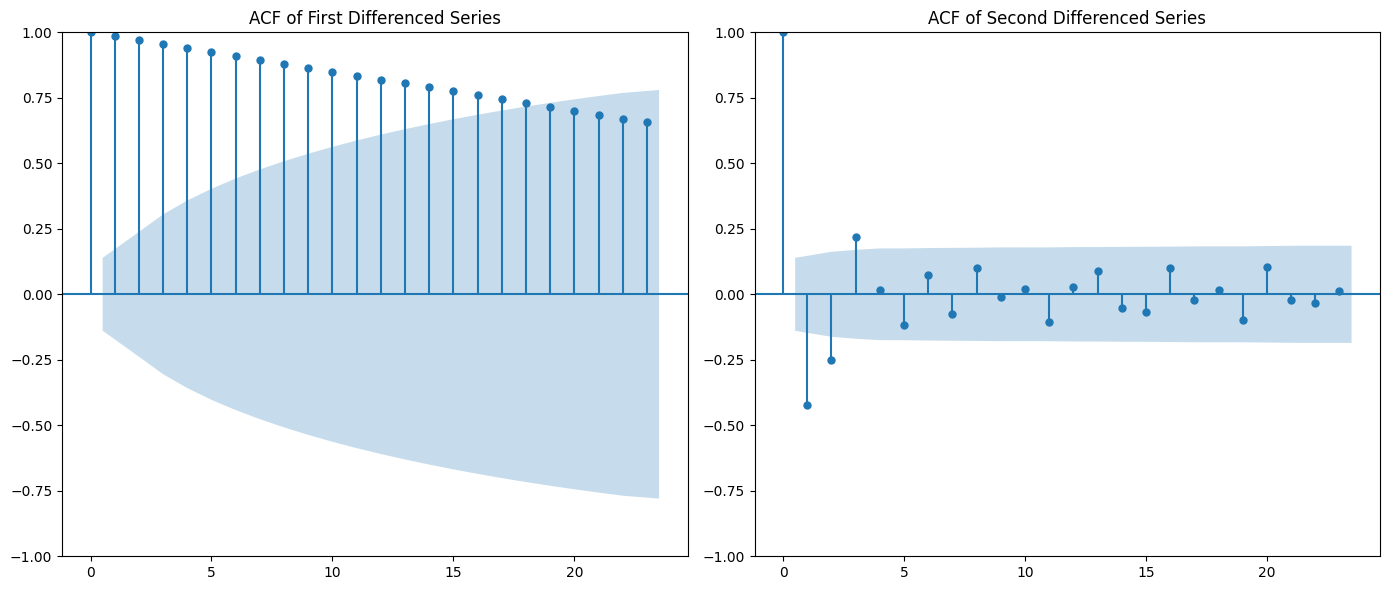

In [ ]:
# Plotting the ACFs using statsmodels' plot_acf
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_x, ax=plt.gca(), title="ACF of First Differenced Series")

plt.subplot(1, 2, 2)
plot_acf(diff2_x, ax=plt.gca(), title="ACF of Second Differenced Series")

plt.tight_layout()
plt.show()